In [12]:
"""
Detectar la posición (centroide) de una esfera oscura sobre un fondo blanco
en una imagen estática.

Requisitos:
    pip install opencv-python-headless numpy

Uso:
    python detectar_bola.py ruta/a/imagen.jpg
"""

import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
from pathlib import Path

In [13]:
path_img="Screenshot.png"

In [14]:
# 1. Cargar imagen y asegurar lectura correcta
# Read image
img = cv2.imread(path_img)
orig_h, orig_w = img.shape[:2]
if img is None:
    raise FileNotFoundError(f"No se pudo abrir la imagen: {path_img}")

In [60]:
print("Las dimensiones de la imagen.... (ORIGINAL en las tres bandas de color Red-Green-Blue)")
np.shape(img)

Las dimensiones de la imagen.... (ORIGINAL en las tres bandas de color Red-Green-Blue)


(1168, 966, 3)

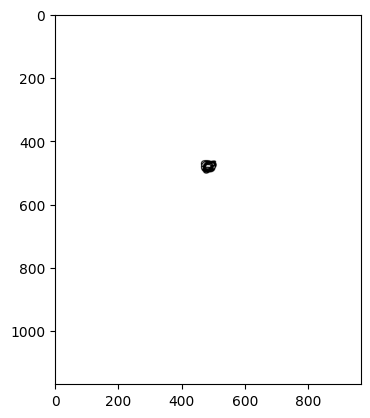

In [16]:
plt.imshow(img,cmap="gray")

In [17]:
# 2. Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

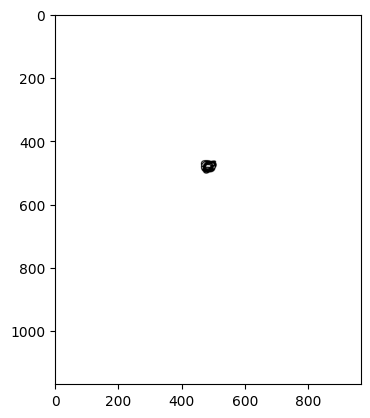

In [18]:
plt.imshow(gray,cmap="gray")

In [59]:
print("Las dimensiones de la imagen.... (GRAY)")
np.shape(gray)

Las dimensiones de la imagen.... (GRAY)


(1168, 966)

In [20]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]],
      shape=(1168, 966), dtype=uint8)

In [23]:
gray[0].max(), gray[0].min(), gray[500].max(), gray[500].min()

(np.uint8(255), np.uint8(255), np.uint8(255), np.uint8(0))

In [24]:
gray[500]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [25]:
gray500=gray[500]

In [29]:
len(gray500[gray500!=255])/len(gray500)*100

2.2774327122153206

In [34]:
# Calculando el porcentaje de pixeles del manchon
len(gray[gray!=255])/np.shape(gray)[0]/np.shape(gray)[1]*100

0.15377279559828694

In [35]:
gray[gray!=255]

array([219, 165, 135, ..., 121, 178, 249], shape=(1735,), dtype=uint8)

In [36]:
1735/(1168*966)*100

0.15377279559828697

In [30]:
print("El máximo es",np.max(gray))
print("El mínimo es",np.min(gray))
print("El promedio es",np.mean(gray))
print("La desviación estándar es",np.std(gray))

El máximo es 255
El mínimo es 0
El promedio es 254.64523862701722
La desviación estándar es 9.333335909974636


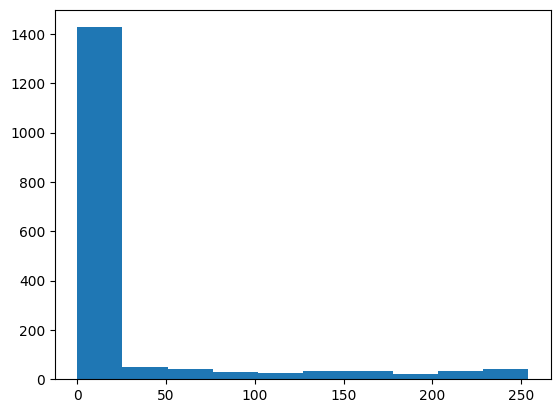

In [65]:
#Calculando el histograma de la mancha...
plt.hist(gray[gray!=255], bins=10)
plt.show()

In [38]:
# Slight blur to reduce noise
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

(array([[ 0.,  0.,  0., ...,  0.,  0., 60.],
        [ 0.,  0.,  0., ...,  0.,  0., 60.],
        [ 0.,  0.,  0., ...,  0.,  0., 60.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0., 60.],
        [ 0.,  0.,  0., ...,  0.,  0., 60.],
        [ 0.,  0.,  0., ...,  0.,  0., 60.]], shape=(70, 50)),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 70 BarContainer objects>)

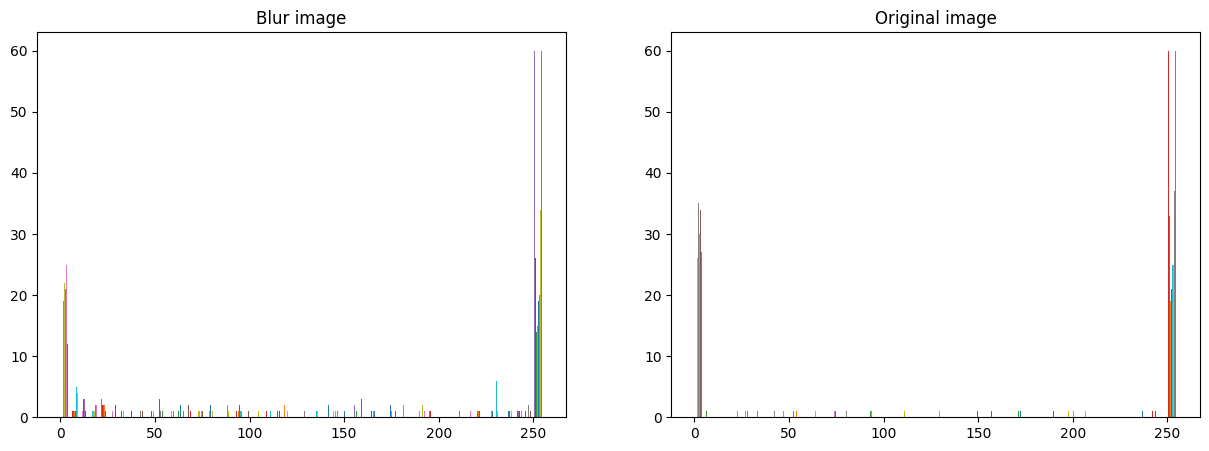

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Blur image")
plt.hist(gray_blur[450:510,450:520],bins=50)
plt.subplot(122)
plt.title("Original i
mage")
plt.hist(gray[450:510,450:520],bins=50)

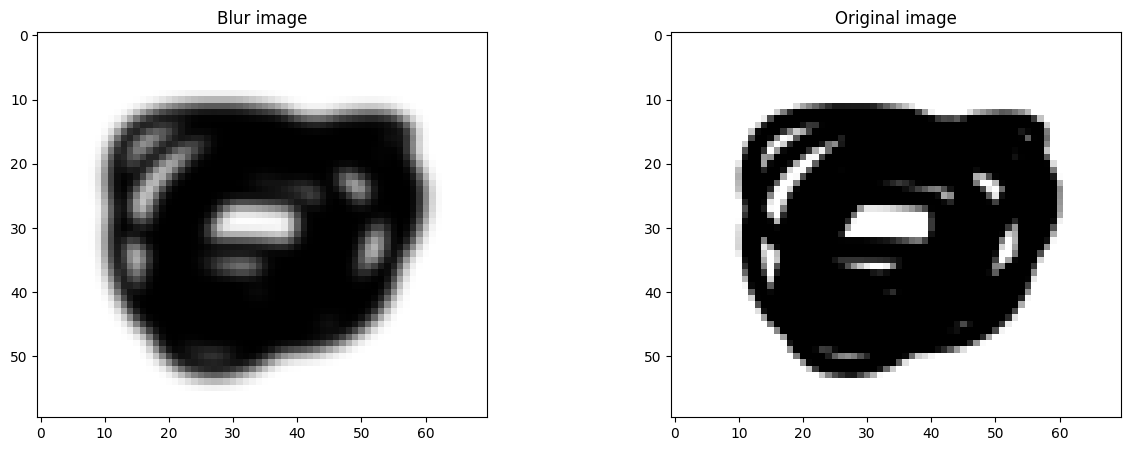

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Blur image")
plt.imshow(gray_blur[450:510,450:520],cmap="gray")
plt.subplot(122)
plt.title("Original image")
plt.imshow(gray[450:510,450:520],cmap="gray")

In [48]:
# Otsu threshold: because the dot is dark on a bright background
# THRESH_BINARY_INV turns the dark dot to white on black background
_, mask = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [49]:
# Remove tiny noise (opening)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)


In [50]:
# Find contours
cnts, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not cnts:
    raise RuntimeError("No contours found. Try adjusting preprocessing.")

In [51]:
# Choose the largest contour (by area) to represent the dot
areas = [cv2.contourArea(c) for c in cnts]
largest_idx = int(np.argmax(areas))
dot_contour = cnts[largest_idx]

In [52]:
# Compute centroid with spatial moments
M = cv2.moments(dot_contour)
if M["m00"] == 0:
    # Fallback: mean of contour points
    cx = float(np.mean(dot_contour[:, 0, 0]))
    cy = float(np.mean(dot_contour[:, 0, 1]))
else:
    cx = float(M["m10"] / M["m00"])
    cy = float(M["m01"] / M["m00"])

In [53]:
# Make a copy for visualization (convert to RGB for matplotlib)
img_vis = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
# Draw the contour and centroid
cv2.drawContours(img_vis, [dot_contour], -1, (0, 255, 0), 2)
cv2.circle(img_vis, (int(round(cx)), int(round(cy))), 10, (255, 0, 0), -1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [54]:
print(f"Image size: {orig_w} x {orig_h} (w x h, pixels)")
print(f"Detected centroid (x, y) in pixel coordinates (origin at top-left): ({cx:.2f}, {cy:.2f})")

Image size: 966 x 1168 (w x h, pixels)
Detected centroid (x, y) in pixel coordinates (origin at top-left): (484.41, 480.24)


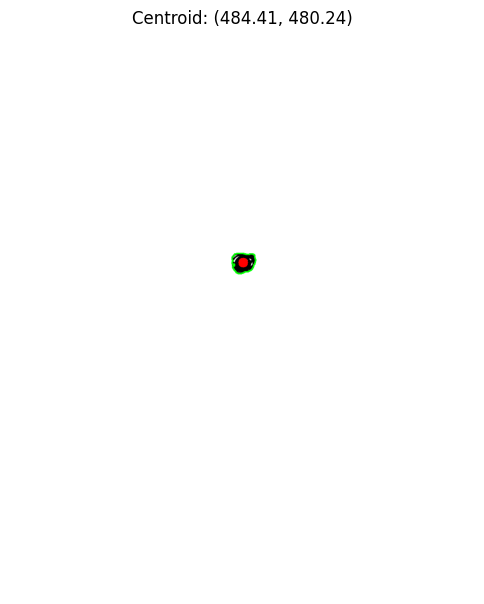

In [55]:
plt.figure(figsize=(6, 8))
plt.imshow(img_vis)
plt.title(f"Centroid: ({cx:.2f}, {cy:.2f})")
plt.axis('off')
plt.show()

In [56]:
cx

484.4065387348969

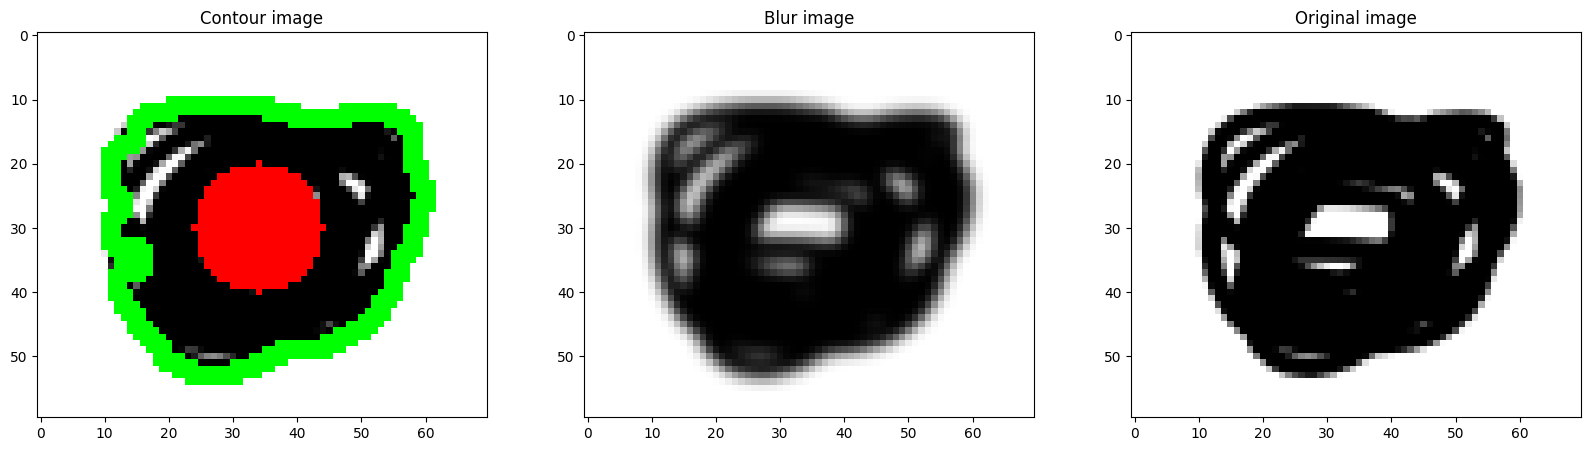

In [58]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.title("Contour image")
plt.imshow(img_vis[450:510,450:520],cmap="gray")
plt.subplot(132)
plt.title("Blur image")
plt.imshow(gray_blur[450:510,450:520],cmap="gray")
plt.subplot(133)
plt.title("Original image")
plt.imshow(gray[450:510,450:520],cmap="gray")